In [1]:
train_dir = r'C:\Users\muham\Downloads\TRAIN'
vali_dir = r'C:\Users\muham\Downloads\validation'
test_dir = r'C:\Users\muham\Downloads\TEST'

# DECODE, CAST AND CONVERT IMAGES

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255) # other functions like Sheer and Zoom can also be applied
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# make tensor image generators
train_generator = train_datagen.flow_from_directory(
             train_dir,
             target_size=(150, 150),
             batch_size=20,
             class_mode='binary')

Found 2000 images belonging to 2 classes.


In [5]:
# make tensor image generators
vld_generator = test_datagen.flow_from_directory(
             vali_dir,
             target_size=(150, 150),
             batch_size=20,
             class_mode='binary')

Found 1000 images belonging to 2 classes.


In [6]:
# we import the modelling algorithms 
from tensorflow.keras import layers 
from tensorflow.keras import models

# Lets start Modelling the CNN Classifier

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))       # As per target chosen above and 3 dimensions required- images will moe be be 75x57
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu')) #32  * 2 - images will now be size 37x37
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu')) # 64 * 2 - images will now be size 18x18
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu')) # 64 * 2 - images will now be size 9x9
model.add(layers.MaxPooling2D((2,2)))

# Flatten model
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(512, activation='relu'))

# single output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate= 1e-4),
              metrics=['acc'])

In [11]:
# Fit the model
history = model.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=20,
          validation_data= vld_generator,
          validation_steps=50)

Epoch 1/20
100/100 [==============================] - 59s 590ms/step - loss: 0.6901 - acc: 0.5355 - val_loss: 0.6727 - val_acc: 0.5630
Epoch 2/20
100/100 [==============================] - 61s 611ms/step - loss: 0.6593 - acc: 0.6080 - val_loss: 0.6401 - val_acc: 0.6270
Epoch 3/20
100/100 [==============================] - 67s 673ms/step - loss: 0.6046 - acc: 0.6705 - val_loss: 0.6128 - val_acc: 0.6610
Epoch 4/20
100/100 [==============================] - 71s 711ms/step - loss: 0.5667 - acc: 0.6900 - val_loss: 0.7221 - val_acc: 0.5890
Epoch 5/20
100/100 [==============================] - 74s 736ms/step - loss: 0.5373 - acc: 0.7250 - val_loss: 0.6068 - val_acc: 0.6680
Epoch 6/20
100/100 [==============================] - 71s 712ms/step - loss: 0.5194 - acc: 0.7415 - val_loss: 0.5928 - val_acc: 0.6800
Epoch 7/20
100/100 [==============================] - 72s 717ms/step - loss: 0.4909 - acc: 0.7655 - val_loss: 0.5863 - val_acc: 0.7000
Epoch 8/20
100/100 [==============================] - 7

# As shown we have achieved:
- 91% Accuracy 
- 75% Validation Accuracy
- loss of 21%
- Validation loss 63% 
# This shows it identified 9 correct cats and dogs from every 10 pictures

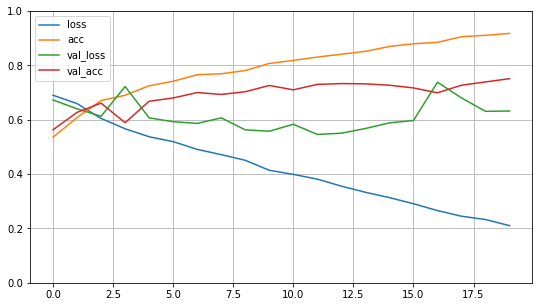

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
pd.DataFrame(history.history).plot(figsize=(9,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Save Model

In [13]:
model.save('CNN MOdel by Ammar')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN MOdel by Ammar\assets
